In [162]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [3]:
#connect to existing database
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [4]:
session = Session(bind=engine)


In [5]:
Base = automap_base()


In [6]:
Base.prepare(engine, reflect=True)

In [7]:
Base.classes.keys()

['measurements', 'stations']

In [8]:
Measurements = Base.classes.measurements

In [9]:
Stations = Base.classes.stations

Precipitation Analysis
- Design a query to retrieve the last 12 months of precipitation data.
- Select only the date and prcp values.
- Load the query results into a Pandas DataFrame and set the index to the date column.
- Plot the results using the DataFrame plot method.




In [10]:
prcp = session.query(Measurements.prcp).all()

In [11]:
date = session.query(Measurements.date).all()

In [12]:
new_date = session.query(Measurements.date).\
    filter(Measurements.date > '2016-12-31').\
    order_by(Measurements.date).all()

In [13]:
session.query(Measurements.date).order_by(Measurements.date.desc()).all()

[('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-09'),
 ('2017-08-09'),
 ('2017-08-09'

In [222]:
measurement_data = conn.execute("select date, prcp from Measurements WHERE date > '2016-12-31'").fetchall()

In [15]:
date_time_list = []
prcp_list = []
for date in measurement_data:
    date_time_list.append(date[0])
    prcp_list.append(date[1])

In [21]:
import seaborn as sns

In [16]:
import datetime as dt
from datetime import datetime


In [17]:
dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in date_time_list]


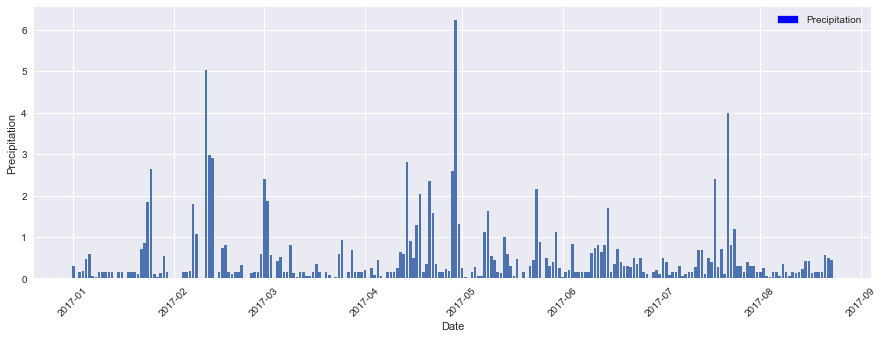

In [36]:
sns.set()
plt.figure(figsize=(15,5))
plt.bar(left = dates_list, height = prcp_list )
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Precipitation")

patch = mpatches.Patch(color = "blue", label='Precipitation')
plt.legend(handles=[patch])
plt.show()

Use Pandas to print the summary statistics for the precipitation data.





In [40]:
hwm = pd.read_csv("hawaii_measurements.csv")
hwm["prcp"].describe()

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64

In [52]:
#hwm

Station Analysis

    Design a query to calculate the total number of stations.

    Design a query to find the most active stations.
        - List the stations and observation counts in descending order
        - Which station has the highest number of observations?

    Design a query to retrieve the last 12 months of temperature observation data (tobs).


Filter by the station with the highest number of observations.
Plot the results as a histogram with bins=12.

In [50]:
total_number_of_stations = conn.execute("SELECT COUNT(*) FROM stations;").fetchall()
print("The total number of stations are %s " % (total_number_of_stations))

The total number of stations are [(9,)] 


In [54]:
#USC00519523 station has a total of 82
conn.execute("SELECT station, tobs  FROM Measurements GROUP BY station ;").fetchall()

[('USC00511918', 64),
 ('USC00513117', 77),
 ('USC00514830', 82),
 ('USC00516128', 76),
 ('USC00517948', 81),
 ('USC00518838', 70),
 ('USC00519281', 79),
 ('USC00519397', 81),
 ('USC00519523', 82)]

In [83]:
date_and_tobs = conn.execute("SELECT date, tobs FROM Measurements LEFT JOIN Stations ON Measurements.station = Stations.station WHERE date > '2016-12-31'").fetchall()

In [259]:
dates = conn.execute("SELECT date, prcp FROM Measurements WHERE date >= 2017-10-1 and date <= 2017-10-2")

In [260]:
dates

In [261]:
for date in dates:
    print(date)

In [84]:
date_list1 = [] 
tobs_list = []
for data in date_and_tobs:
    time = dt.datetime.strptime(data[0], "%Y-%m-%d").date()
    date_list1.append(time)
    tobs_list.append(data[1])

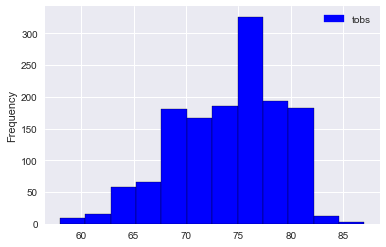

In [85]:
plt.hist(tobs_list, bins = 12, color = "blue", edgecolor = "black")
plt.ylabel("Frequency")
patch = mpatches.Patch(color = "blue", label='tobs')
plt.legend(handles=[patch])
plt.show()

In [67]:
conn.execute("SELECT station FROM Stations").fetchall() 


[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

### Temperature Data 
Temperature Analysis


Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

Plot the min, avg, and max temperature from your previous query as a bar chart.


Use the average temperature as the bar height.
Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [ ]:
time_df = pd.DataFrame(date_and_tobs, columns = ["Date", "Tobs"])
time_df["Date"] = pd.to_datetime(time_df["Date"])

In [170]:
def calc_temps(start_date, end_date):
    start_and_finish = time_df[(time_df["Date"] >= start_date) & (time_df["Date"] <= end_date)] 
    mean = round(np.mean(start_and_finish["Tobs"]), 2)
    minimum = np.min(start_and_finish["Tobs"])
    maximum = np.max(start_and_finish["Tobs"])
    
    print("The average Temperature from %s to %s is %s" % (start_date, end_date, mean ))
    print("The minimum Temperature from %s to %s is %s" % (start_date, end_date, minimum ))
    print("The maximum Temperature from %s to %s is %s" % (start_date, end_date, maximum ))

In [172]:
calc_temps("2017-1-20", "2017-2-20")

The average Temperature from 2017-1-20 to 2017-2-20 is 70.01
The minimum Temperature from 2017-1-20 to 2017-2-20 is 59
The maximum Temperature from 2017-1-20 to 2017-2-20 is 80


In [174]:
graph_temp = time_df[(time_df["Date"] >= "2017-01-01")]

In [230]:
mean2 = round(np.mean(start_and_finish["Tobs"]), 1)
mean2

69.5

In [236]:
ave_temperature = [mean2]
x_axis = np.arange(len(ave_temperature))

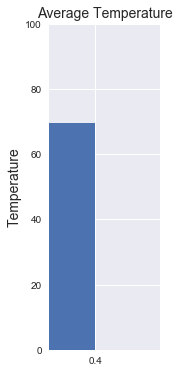

In [238]:
plt.figure(figsize= (2, 6))
plt.bar(left = x_axis, height = ave_temperature)
tick_location = [value+0.4 for value in x_axis]
plt.xticks(tick_location)
plt.xlim(-.025, len(x_axis))
plt.ylim(0, 100, 5)
plt.ylabel("Temperature", fontsize = 14)
plt.title("Average Temperature", fontsize = 14 )
plt.show()